# Support Vector Machine (SVM)

Principais pontos da aula

  Algoritmo SVM

SVM é um algoritmo de aprendizado supervisionado. São baseados no conceito de planos de decisão; tentamos encontrar o hiperplano que separa as classes;

Definindo o hiperplano ideal - apresente a maior distância entre as margens das duas classes - Utiliza o ponto que está a margem;
  Muito cuidado com os outl - Irá influênciar negativamente;
  Problemas reais dificilmente terá sua delimitação linear;

SVC -
Violação da margem (C) - Permite uma certa tolerância (quanto aceitamos errar);
  Utilizar um artifício (modificar o hiperplano) para nesse novo hiperplano ser linearmente separável e volta para o plano original --> Conceito de função Kernel (Kernel trick)

  RBF - ;

Vantagens
  Eficaz em espaços de alta dimensão: idela para problemas com muitas variáveis;
  Útil para classificação linear e não linear;
  Versatilidade - Funciona para classificação e regressão;
  Eficaz em conjuntos de dados pequenos e médios;

Desvantagens
  Para conjuntos de dados grandes é ruim;
  Escolha de kernel e parâmetros;
  Interpretação difícil;
  Sensibilidade ao ruído;

SUposições
  classes devem ser separáveis;
  Dados independentes e identicamente distribuídos;
  Classes devem ser balanceadas e os dados devem ter pouco ruído;

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Criação dos dados

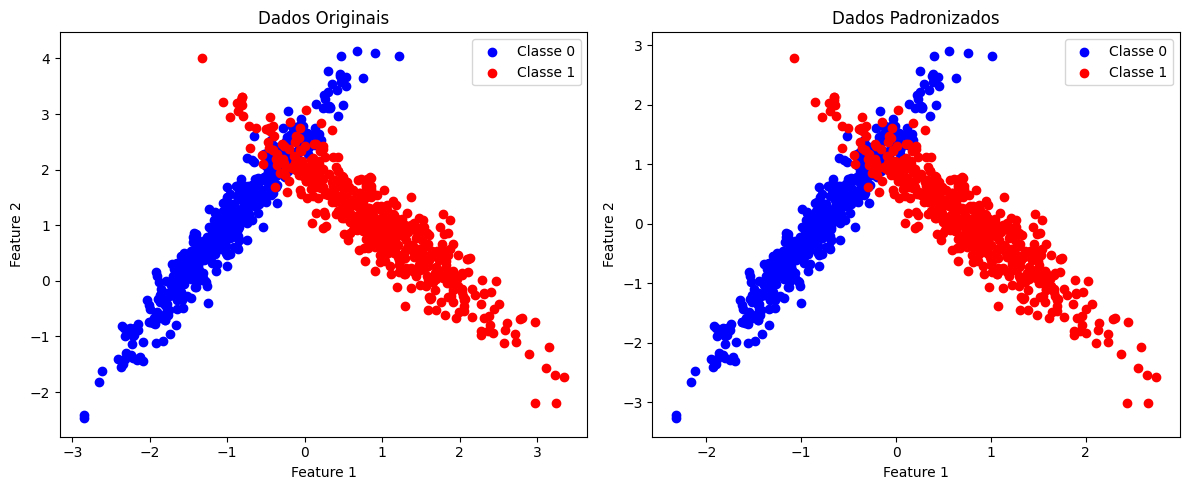

In [26]:
# Criação de dados sintéticos para classificação binária
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=42)

# Visualizar os primeiros dados
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Plotar dados originais
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df[df['Target'] == 0]['Feature1'], df[df['Target'] == 0]['Feature2'], color='blue', label='Classe 0')
plt.scatter(df[df['Target'] == 1]['Feature1'], df[df['Target'] == 1]['Feature2'], color='red', label='Classe 1')
plt.title('Dados Originais')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criar DataFrame para dados padronizados
df_scaled = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
df_scaled['Target'] = y

# Plotar dados padronizados
plt.subplot(1, 2, 2)
plt.scatter(df_scaled[df_scaled['Target'] == 0]['Feature1'], df_scaled[df_scaled['Target'] == 0]['Feature2'], color='blue', label='Classe 0')
plt.scatter(df_scaled[df_scaled['Target'] == 1]['Feature1'], df_scaled[df_scaled['Target'] == 1]['Feature2'], color='red', label='Classe 1')
plt.title('Dados Padronizados')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Divisão dos dados padronizados

In [27]:
# Salvando dados originais
df.to_csv('dados_originais.csv', index=False)

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvando dados padronizados
df_scaled = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
df_scaled['Target'] = y
df_scaled.to_csv('dados_padronizados.csv', index=False)

# Dividir dados antes da padronização
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir dados após padronização
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Treinamento do modelo para diferentes Kernels

Modelo: SVM linear (Sem Padronização)
Acurácia: 0.92
Matriz de Confusão:
AUC-ROC: 0.94
Modelo: SVM linear (Com Padronização)
Acurácia: 0.92
Matriz de Confusão:
AUC-ROC: 0.94
Modelo: SVM poly (Sem Padronização)
Acurácia: 0.93
Matriz de Confusão:
AUC-ROC: 0.94
Modelo: SVM poly (Com Padronização)
Acurácia: 0.90
Matriz de Confusão:
AUC-ROC: 0.95
Modelo: SVM rbf (Sem Padronização)
Acurácia: 0.93
Matriz de Confusão:
AUC-ROC: 0.99
Modelo: SVM rbf (Com Padronização)
Acurácia: 0.94
Matriz de Confusão:
AUC-ROC: 0.99


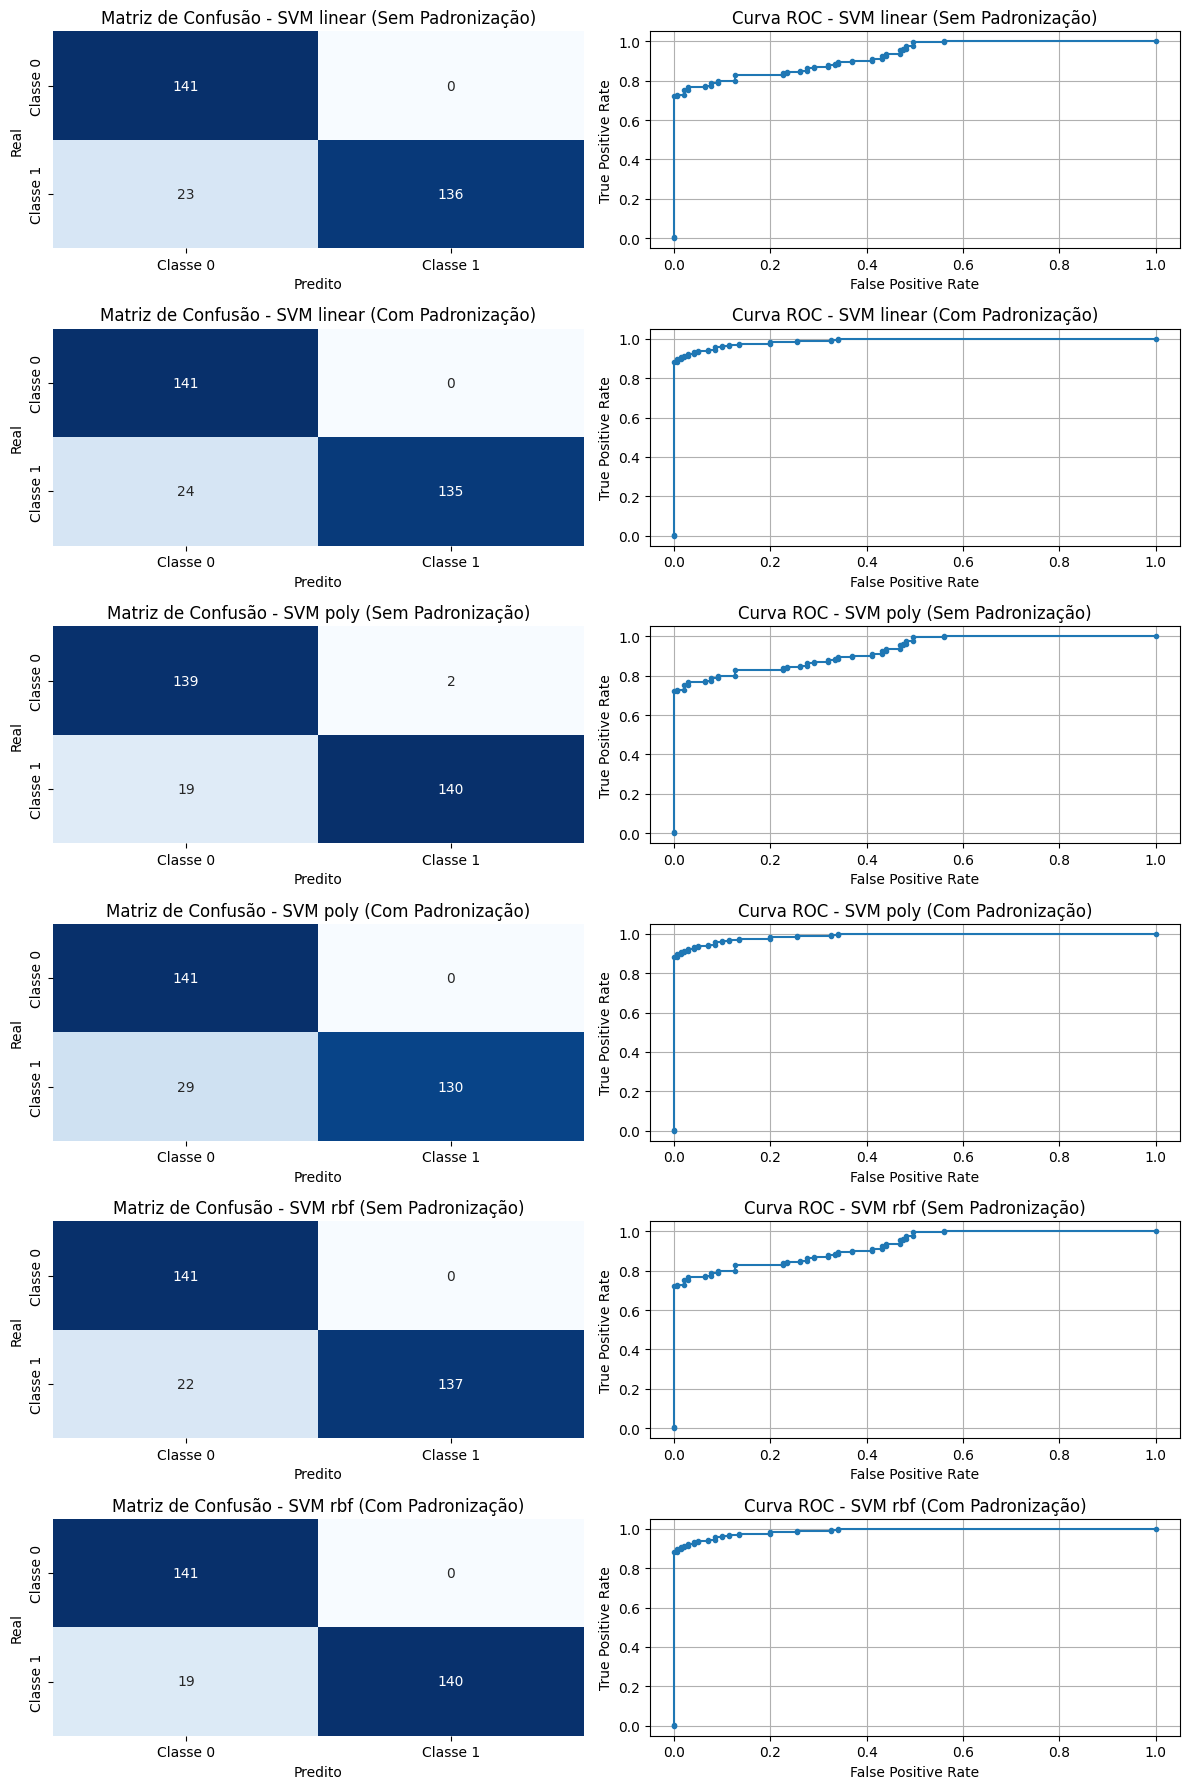

In [28]:
# Treinamento do modelo SVM com diferentes kernels
kernels = ['linear', 'poly', 'rbf']

# Dicionário para armazenar os modelos e suas métricas
models = {}

for kernel in kernels:
    # Criar o modelo SVM
    clf = SVC(kernel=kernel, probability=True, random_state=42)

    # Treinar o modelo
    clf.fit(X_train, y_train)

    # Fazer previsões
    y_pred = clf.predict(X_test)

    # Avaliação do modelo
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, clf.decision_function(X_test))

    models[f"SVM {kernel} (Sem Padronização)"] = {
        'accuracy': acc,
        'conf_matrix': conf_matrix,
        'roc_auc': roc_auc
    }

    # Treinamento do modelo com dados padronizados
    clf.fit(X_train_scaled, y_train)
    y_pred_scaled = clf.predict(X_test_scaled)

    acc_scaled = accuracy_score(y_test, y_pred_scaled)
    conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
    roc_auc_scaled = roc_auc_score(y_test, clf.decision_function(X_test_scaled))

    models[f"SVM {kernel} (Com Padronização)"] = {
        'accuracy': acc_scaled,
        'conf_matrix': conf_matrix_scaled,
        'roc_auc': roc_auc_scaled
    }

# Função para plotar a Matriz de Confusão
def plot_confusion_matrix(ax, cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Classe 0', 'Classe 1'],
                yticklabels=['Classe 0', 'Classe 1'], ax=ax)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')
    ax.set_title(title)

# Função para plotar a Curva ROC
def plot_roc_curve(ax, y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    ax.plot(fpr, tpr, marker='.')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.grid(True)

# Número de modelos
num_models = len(models)

# Criar uma figura com subplots ajustados para todos os modelos
fig, axes = plt.subplots(num_models, 2, figsize=(12, 3 * num_models))

# Garantir que axes seja sempre um array 2D mesmo para um modelo
if num_models == 1:
    axes = np.array([axes])

# Plotar resultados para cada modelo
for i, (model_name, metrics) in enumerate(models.items()):
    print(f"Modelo: {model_name}")
    print(f"Acurácia: {metrics['accuracy']:.2f}")
    print("Matriz de Confusão:")

    # Plotar Matriz de Confusão no primeiro subplot da linha i
    plot_confusion_matrix(axes[i, 0], metrics['conf_matrix'], f'Matriz de Confusão - {model_name}')

    # Plotar Curva ROC no segundo subplot da linha i
    y_scores = clf.decision_function(X_test if 'Com Padronização' not in model_name else X_test_scaled)
    plot_roc_curve(axes[i, 1], y_test, y_scores, f'Curva ROC - {model_name}')

    print(f"AUC-ROC: {metrics['roc_auc']:.2f}")

# Ajustar layout e mostrar a figura
plt.tight_layout()
plt.show()


# Analisando as curvas alterando o valor de C

In [29]:
# Valores para o parâmetro C
C_values = [0.1, 1, 10, 100]

# Dicionário para armazenar os resultados
svm_results = {}

for C in C_values:
    # Treinamento do modelo SVM com diferentes valores de C
    clf = SVC(kernel='linear', C=C, probability=True, random_state=42)
    clf.fit(X_train, y_train)

    # Avaliação do modelo
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, clf.decision_function(X_test))

    svm_results[f"SVM Linear C={C} (Sem Padronização)"] = {
        'accuracy': acc,
        'conf_matrix': conf_matrix,
        'roc_auc': roc_auc
    }

    # Treinamento do modelo com dados padronizados
    clf.fit(X_train_scaled, y_train)
    y_pred_scaled = clf.predict(X_test_scaled)

    acc_scaled = accuracy_score(y_test, y_pred_scaled)
    conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
    roc_auc_scaled = roc_auc_score(y_test, clf.decision_function(X_test_scaled))

    svm_results[f"SVM Linear C={C} (Com Padronização)"] = {
        'accuracy': acc_scaled,
        'conf_matrix': conf_matrix_scaled,
        'roc_auc': roc_auc_scaled
    }


# Análise das diferentes curvas para C = 1

<ipython-input-30-c8782c290211>:43: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot([0, 1], [0, 1], 'k--', label='Random', linestyle='--')


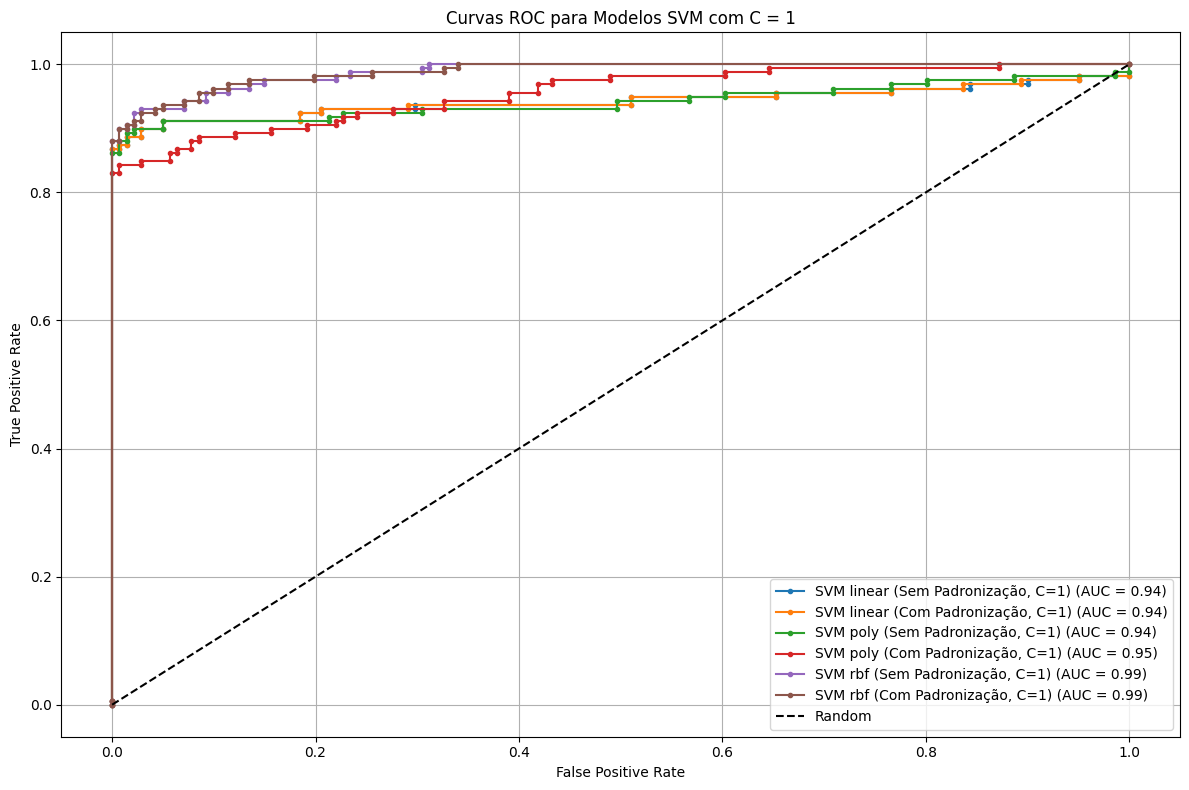

In [30]:
# Dicionário para armazenar resultados da curva ROC para C=1
roc_results = {}

# Definir kernels e C
kernels = ['linear', 'poly', 'rbf']
C = 1

# Recalcular e armazenar resultados para C = 1 e diferentes kernels
for kernel in kernels:
    for scaled in [False, True]:
        # Nome do modelo para identificação
        if scaled:
            model_name = f"SVM {kernel} (Com Padronização, C={C})"
            X_train_current, X_test_current = X_train_scaled, X_test_scaled
        else:
            model_name = f"SVM {kernel} (Sem Padronização, C={C})"
            X_train_current, X_test_current = X_train, X_test

        # Criar o modelo SVM com C = 1
        clf = SVC(kernel=kernel, C=C, probability=True, random_state=42)
        clf.fit(X_train_current, y_train)
        y_scores = clf.decision_function(X_test_current)

        # Calcular fpr, tpr e roc_auc
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)

        # Armazenar resultados
        roc_results[model_name] = {
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        }

# Criar uma figura com um único eixo para todas as curvas ROC
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar todas as Curvas ROC no mesmo gráfico
for model_name, metrics in roc_results.items():
    ax.plot(metrics['fpr'], metrics['tpr'], marker='.', label=f'{model_name} (AUC = {metrics["roc_auc"]:.2f})')

# Adicionar a linha diagonal para comparação
ax.plot([0, 1], [0, 1], 'k--', label='Random', linestyle='--')

# Adicionar legendas e título
ax.set_title('Curvas ROC para Modelos SVM com C = 1')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')
ax.grid(True)

# Ajustar layout e mostrar a figura
plt.tight_layout()
plt.show()


# Conclusão

### Conclusão

Neste notebook, exploramos a aplicação do algoritmo de Máquinas de Vetores de Suporte (SVM) em um conjunto de dados sintéticos para classificação binária. O processo envolveu várias etapas chave, desde a criação e padronização dos dados até a avaliação do modelo utilizando diferentes kernels e parâmetros.


1. **Treinamento e Avaliação do Modelo**: Treinamos modelos SVM com diferentes kernels (linear, polinomial e radial) tanto com dados originais quanto padronizados. A avaliação incluiu métricas como acurácia, matriz de confusão e a curva ROC. A curva ROC e a AUC (Área sob a Curva) foram particularmente úteis para entender a capacidade de discriminação dos modelos.

2. **Impacto da Padronização**: Os resultados mostraram que a padronização dos dados teve um impacto significativo na performance dos modelos. Em muitos casos, os modelos treinados com dados padronizados apresentaram uma melhor acurácia e uma AUC mais alta em comparação com os modelos treinados com dados não padronizados. Isso se deve ao fato de que a padronização coloca todas as características na mesma escala, o que ajuda o SVM a encontrar melhores limites de decisão e a convergir mais rapidamente.

3. **Otimização de Parâmetros**: Também exploramos a influência do parâmetro de regularização \(C\) para o kernel linear. Notamos que valores diferentes de \(C\) afetaram o desempenho dos modelos, com um impacto notável na acurácia e na curva ROC. Valores de \(C\) maiores tendem a ajustar mais o modelo aos dados de treinamento, enquanto valores menores proporcionam um modelo mais generalizado.

4. **Conclusão Final**: Em resumo, este notebook demonstrou a importância da padronização dos dados e da escolha adequada dos parâmetros do modelo para melhorar o desempenho do SVM. A comparação dos resultados entre os dados padronizados e não padronizados reforça a importância da preparação dos dados na criação de modelos de classificação eficazes. A análise das curvas ROC e das matrizes de confusão forneceu uma visão clara sobre a eficácia dos modelos em diferentes cenários.